In [ ]:
#!pip install tensorflow


In [ ]:
# import libraries
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
import os

In [ ]:
# Download the MNIST dataset from website
url = 'http://yann.lecun.com/exdb/mnist/'
files = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
         't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']
data_dir = './mnist_data/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for file in files:
    urllib.request.urlretrieve(url + file, data_dir + file)

##Load data

The first stage involves loading the data and then partitioning it into separate datasets for training and testing purposes.

The dataset used for training the model consists of 28x28 pictures of handwritten digits, denoted as x_train.

The variable y_train represents the collection of labels that correspond to the dataset x_train.

The dataset x_test consists of pictures of handwritten digits, each with dimensions of 28x28 pixels, which will be used for testing the model.

The dataset y_test consists of labels that relate to the dataset x_test.




In [ ]:

from tensorflow import keras
from keras.datasets import mnist
# Load the MNIST datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Preprocess the data

It is desired that each value falls between the range of 0.0 and 1.0. To normalise the values, it is necessary to divide them by 255.0, since they all initially lie within the range of 0.0-255.0.

The specification of the input shape is necessary in order to inform the model about the nature of the input data, which consists of 28x28 pictures in the x_train dataset.

In [ ]:
# Normalizing
x_train = x_train.astype('float32')  # convert int8 to float32
x_train =x_train / 255.  #rescale the pixel values in range 0 - 1
x_test = x_test.astype('float32')
x_test = x_test / 255.


# Transforming
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) # transform the labels into one-hot encodings
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Neural Network Model


The proposed architecture consists of a Sequential model consisting of two Conv2D layers, which are afterwards followed by MaxPooling2D layers. This is then followed by a Flatten layer and two completely linked Dense layers. The model accepts a grayscale picture with dimensions of 28x28 as its input and generates a probability distribution that encompasses the 10 potential digit labels.

In [ ]:


from keras import layers, Sequential, models # import libraries


model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

##Compile & Training Model

The provided code builds the model using the categorical_crossentropy loss function, the adam optimizer, and the accuracy metric. Subsequently, the model is trained on the training set over a span of 5 epochs, using a batch size of 32. Following each epoch, the model's performance is assessed by evaluating it on the test set.

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          epochs=5,
          batch_size=32,
          validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1376 - accuracy: 0.9585 - val_loss: 0.0489 - val_accuracy: 0.9828
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.0374 - val_accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0228 - val_accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0318 - val_accuracy: 0.9903


## Evaluate the Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0318 - accuracy: 0.9903
Test loss: 0.0317535400390625
Test accuracy: 0.9902999997138977


## Predict Labels

In [ ]:
predicted = model.predict(x_test)


313/313 [==============================] - 3s 8ms/step


In [ ]:
predicted = np.argmax(np.round(predicted),axis=1)  # np.argmax()  find the index of the maximum value in each row of the array.

In [ ]:
y_test = np.argmax(np.round(y_test),axis =1)   # np.argmax()  find the index of the maximum value in each row of the array.

In [ ]:
predicted.shape, y_test.shape

((10000,), (10000,))

Found %d correct labels 9899


<ipython-input-14-957d7b694790>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


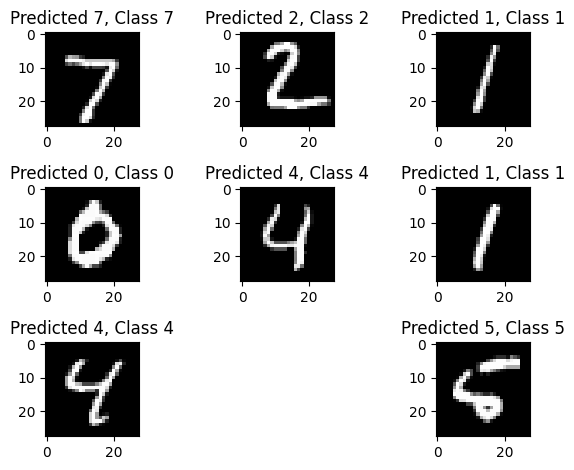

In [ ]:
correct = np.where(predicted==y_test)[0]
print ("Found %d correct labels",len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[correct], y_test[correct]))
    plt.tight_layout()

## Result of Correctly Predicted
Here all the images are not similar pattern. So all the class are corrently predicted.

Found %d incorrect labels 101


<ipython-input-15-a83a984f5786>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


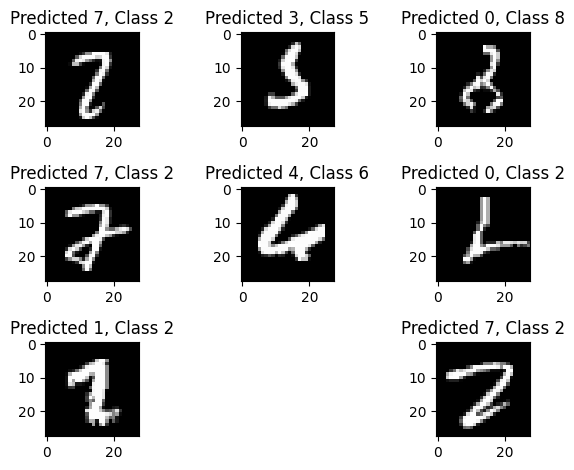

In [ ]:
incorrect = np.where(predicted!=y_test)[0]
print ("Found %d incorrect labels",len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[incorrect], y_test[incorrect]))
    plt.tight_layout()

Here model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture. For example, images number 3 and 6 both belong to different classes but look kind of similar to 3 and 7. but  those are 5 and 2.